### This notebook looks at plots in pre-run dipy pipeplines.

Pipeline: http://localhost:8893/edit/Code/whobpyt/Intro_to_dMRI_workshop/SC_Mtx_hig_res_version_2.py

In [ ]:
# importage

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from matplotlib import cm

import os,sys,glob,numpy as np, pandas as pd

from skimage import measure

import nibabel as nib
from nilearn.plotting import plot_surf, plot_surf_stat_map, plot_roi, plot_anat, plot_surf_roi

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from nilearn.image import index_img

from dipy.core.gradients import gradient_table
from dipy.reconst import shm
from dipy.direction import peaks

from dipy.tracking import utils
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.streamline import Streamlines
from dipy.tracking.stopping_criterion import BinaryStoppingCriterion
from dipy.io.dpy import Dpy


import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap

from dipy.tracking.distances import approx_polygon_track

import nilearn

### Note: This pipeline was run for a single HCP subject - 100307

#### Load DWI data

In [2]:
# bvecs

bvecs_file = '/external/rprshnas01/public_datasets/HCP/HCP_S900/100307/T1w/Diffusion/bvecs'
bvecs_dat = np.loadtxt(bvecs_file)

# bvals 

bvals_file = '/external/rprshnas01/public_datasets/HCP/HCP_S900/100307/T1w/Diffusion/bvals'
bvals_dat = np.loadtxt(bvals_file)

# dwi data

dwi_file = '/external/rprshnas01/public_datasets/HCP/HCP_S900/100307/T1w/Diffusion/data.nii.gz'
dwi_img = nib.load(dwi_file)
dwi_dat = dwi_img.get_data()
b0_img = index_img(dwi_img,0)

# load brain mask file ...

nbm_file = '/external/rprshnas01/public_datasets/HCP/HCP_S900/100307/T1w/Diffusion/nodif_brain_mask.nii.gz'
nbm_img = nib.load(nbm_file)
nbm_dat = nbm_img.get_data()

#### Load the 400 Schaefer label file and brain mask file

In [3]:
label_file_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/PyTepFit/Data/fs_directory/100307/mri/100307_Schaefer2018_400Parcels_7Networks_rewritten.nii.gz'
mask_file_path = '/external/rprshnas01/public_datasets/HCP/HCP_S900/100307/T1w/Diffusion/nodif_brain_mask.nii.gz'

label_img = nib.load(label_file_path)
mask_img = nib.load(mask_file_path)

In [4]:
%%time
resampled_label_dat = nilearn.image.resample_img(label_file_path, target_affine=nbm_img.affine, target_shape=mask_img.shape,interpolation='nearest')

CPU times: user 1.84 s, sys: 211 ms, total: 2.05 s
Wall time: 2.57 s


In [5]:
resampled_label_data = resampled_label_dat.get_data()

#### Load the Str Conn Mtxs from the pre-run pipeline

In [7]:
out_dir = '/external/rprshnas01/kcni/hharita/Code/whobpyt/Intro_to_dMRI_workshop'

In [19]:
SC_mtx_d1 = np.loadtxt(out_dir + '/version_2_sub_100307_dwi_str_conn_ntx_density_1.txt')
SC_mtx_d2 = np.loadtxt(out_dir + '/version_2_sub_100307_dwi_str_conn_ntx_density_2.txt')
SC_mtx_d3 = np.loadtxt(out_dir + '/version_2_sub_100307_dwi_str_conn_ntx_density_3.txt')

In [33]:
SC_mtx_d4 = np.loadtxt(out_dir + '/version_2_sub_100307_dwi_str_conn_ntx_density_4.txt')

In [21]:
SC_mtx_d1_sh_order_4 = np.loadtxt(out_dir + '/sub_100307_stop_crit_thrsh_sh_order_4_SC_mtx_density_1.txt')

In [25]:
SC_mtx_d1_sh_order_8 = np.loadtxt(out_dir + '/sub_100307_stop_crit_thrsh_sh_order_8_SC_mtx_density_1.txt')

In [23]:
SC_mtx_d1_stop_crit_bin = np.loadtxt(out_dir + '/version_2_stop_crit_bin_sub_100307_dwi_str_conn_ntx_density_1.txt')

In [31]:
SC_mtx_d2_sh_order_8 = np.loadtxt(out_dir + '/sub_100307_stop_crit_thrsh_sh_order_8_SC_mtx_density_2.txt')

#### Notes: re: time to run pipeline and approx. no. of streamlines generated. 

Takes approx. 15 minutes to run at ```seed_density=1```. --> ~300,000 streamlines  
Takes approx. 90 minutes to run at ```seed_density=2```. --> ~2,700,000 streamlines  
Takes approx. 7 hours to run at ```seed_density=3```. --> ~9,100,000 streamlines  

#### Again, the above numbers are for a SINGLE subject (100307).   
#### The time taken for the pipeline to run and the no.of streamlines generated will vary from subject ot subject.   

#### SC Mtx - `seed_density=1 `; `sh_order=2`

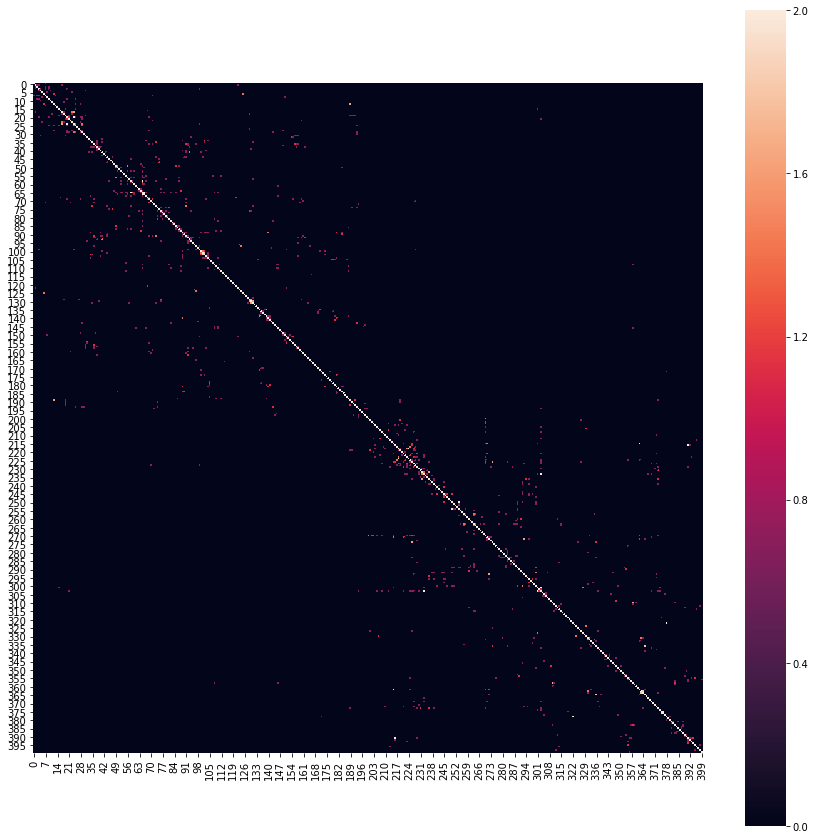

In [18]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d1), ax=ax, vmax=2)
ax.set_aspect('equal')

#### SC Mtx - `seed_density=1 `; `sh_order=4`

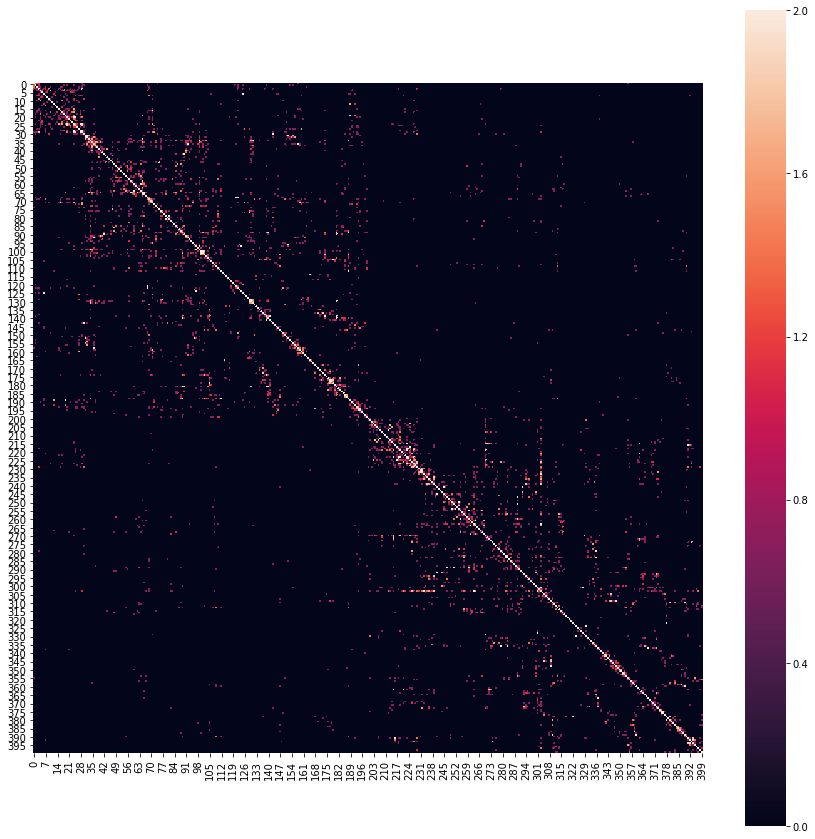

In [22]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d1_sh_order_4), ax=ax, vmax=2)
ax.set_aspect('equal')

#### SC Mtx - `seed_density=1 `; `sh_order=8`

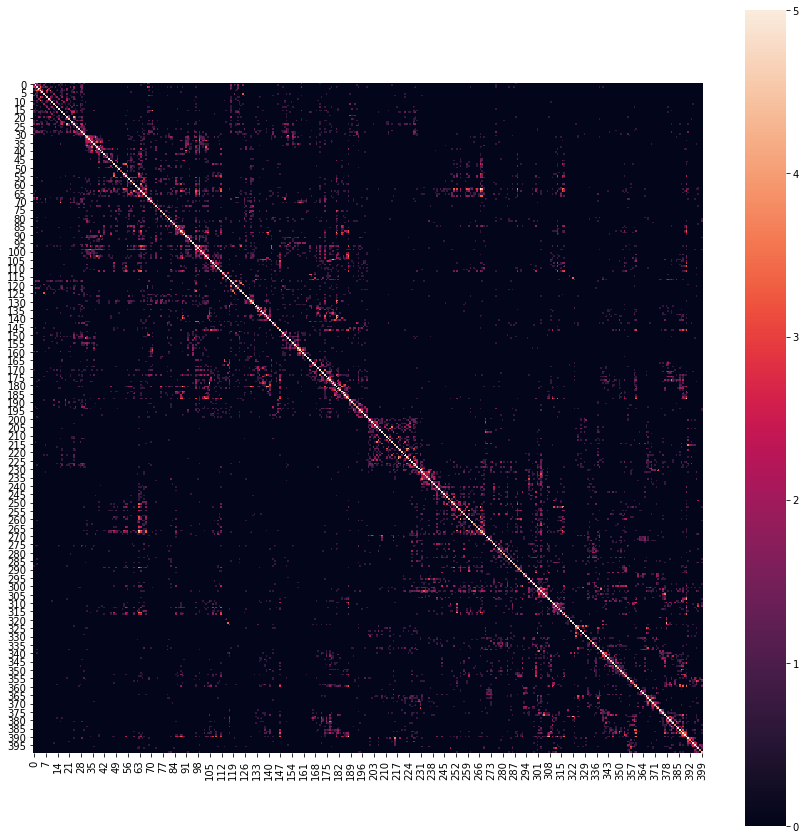

In [28]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d1_sh_order_8), ax=ax, vmax=5)
ax.set_aspect('equal')

#### SC Mtx - `seed_density=1 `; `stopping_criterion=binary`; `sh_order=2`

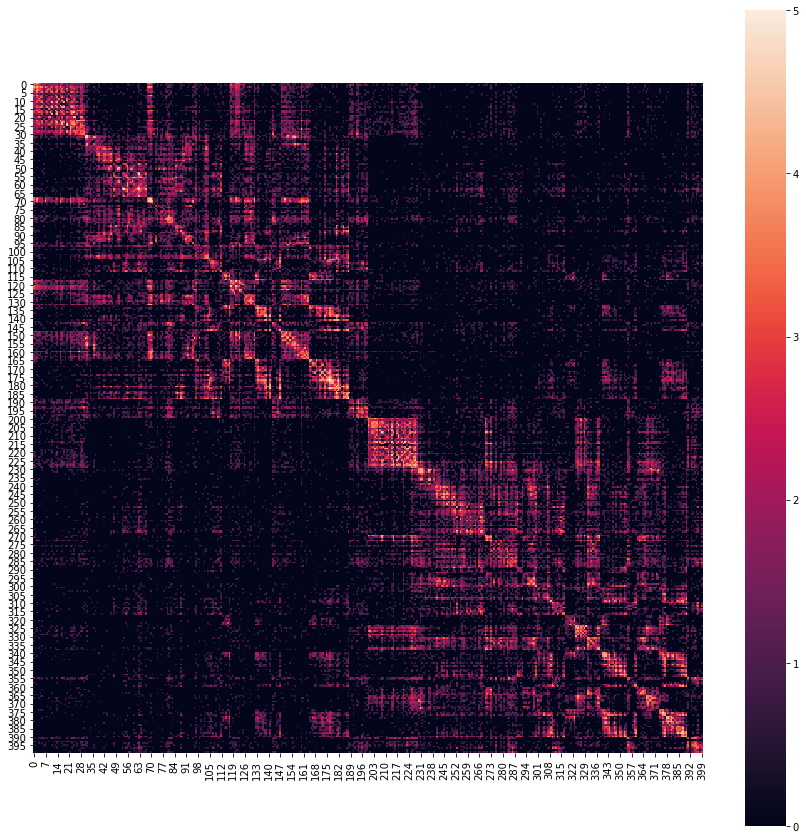

In [27]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d1_stop_crit_bin), ax=ax, vmax=5)
ax.set_aspect('equal')

#### SC Mtx - ```seed_density=2 ```; `sh_order=2`

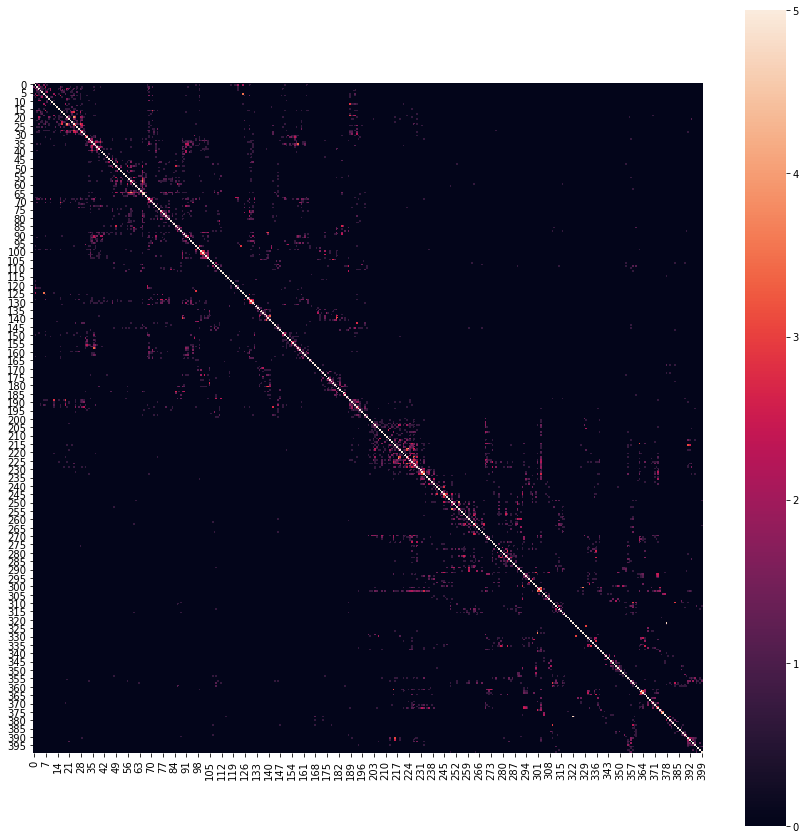

In [29]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d2), ax=ax, vmax=5)
ax.set_aspect('equal')

#### SC Mtx - ```seed_density=2 ```; `sh_order=8`

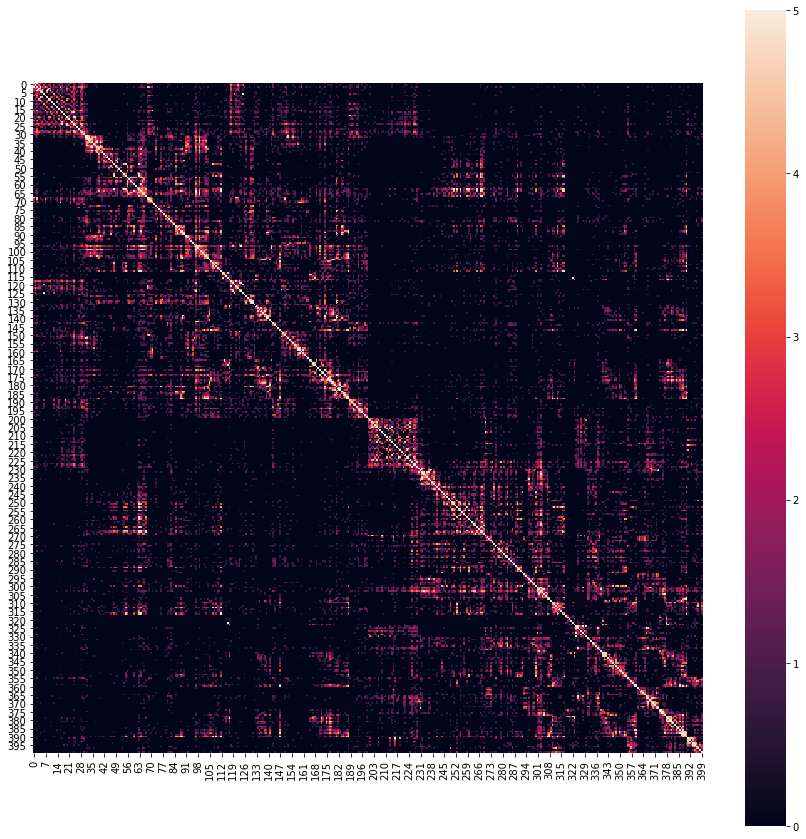

In [32]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d2_sh_order_8), ax=ax, vmax=5)
ax.set_aspect('equal')

#### SC Mtx - ```seed_density=3```; `sh_order=2`

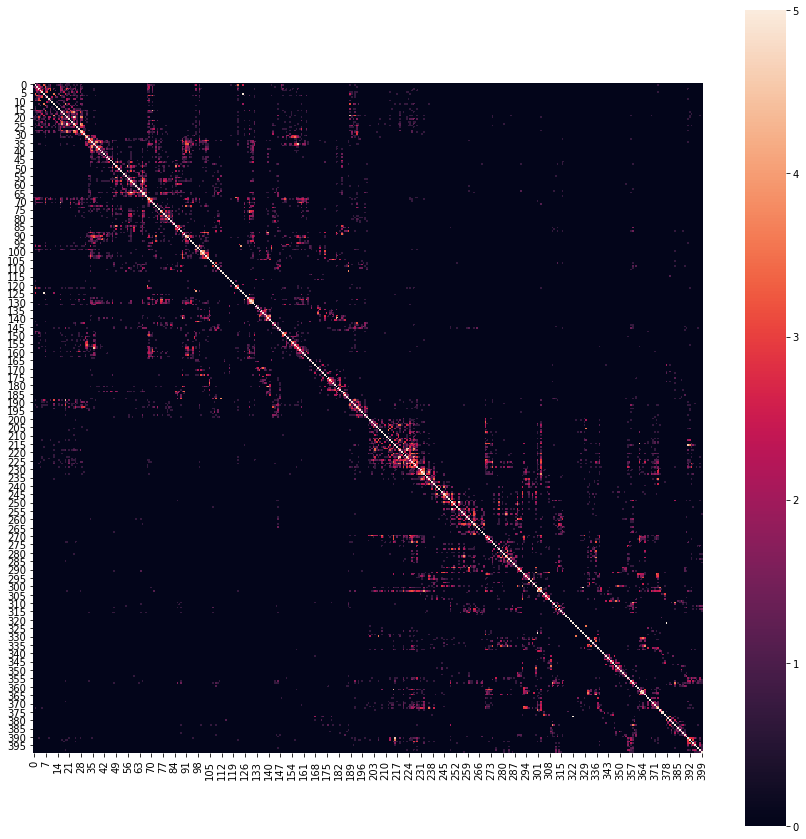

In [30]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d3), ax=ax, vmax=5)
ax.set_aspect('equal')

#### SC Mtx - ```seed_density=4```; `sh_order=2`

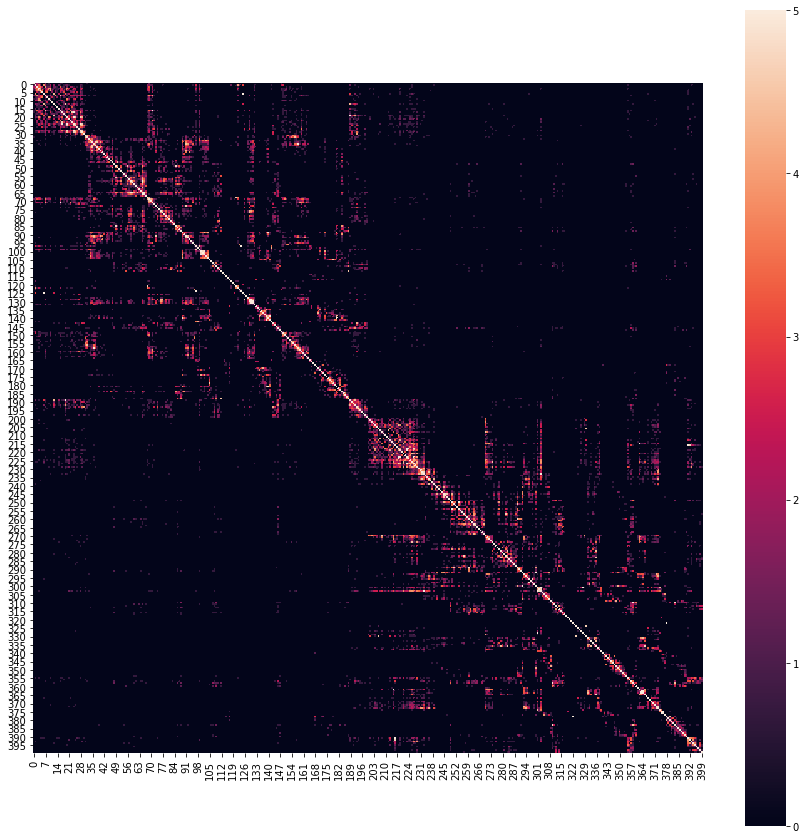

In [36]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(np.log1p(SC_mtx_d4), ax=ax, vmax=5)
ax.set_aspect('equal')

In [41]:
# density
# sh_order
# number of streamlines
# time taken to run

In [42]:
n = 4
m = 10

table = pd.DataFrame(index=range(10), columns=range(n))

In [43]:
table.at[0,0]='seed_density'
table.at[0,1]='sh_order'
table.at[0,2]='# of streamlines'
table.at[0,3]='time taken to run'

table.at[1,0]='1'
table.at[1,1]='2'
table.at[1,2]='339,263'
table.at[1,3]='~15 min'

table.at[2,0]='1'
table.at[2,1]='4'
table.at[2,2]='502,569'
table.at[2,3]='~27 min'


table.at[3,0]='1'
table.at[3,1]='8'
table.at[3,2]='629,951'
table.at[3,3]='~43 min'


table.at[4,0]='2'
table.at[4,1]='2'
table.at[4,2]='2,714,911'
table.at[4,3]='~1.5 hours'


table.at[5,0]='2'
table.at[5,1]='8'
table.at[5,2]='4,528,610'
table.at[5,3]='~7.3 hours'

table.at[6,0]='3'
table.at[6,1]='2'
table.at[6,2]='9,163,380'
table.at[6,3]='~7 hours'

table.at[7,0]='3'
table.at[7,1]='8'
table.at[7,2]='in progress ...'
table.at[7,3]='in progress ...'

table.at[8,0]='4'
table.at[8,1]='2'
table.at[8,2]='21,719,230'
table.at[8,3]='~24 hours'

table.at[9,0]='4'
table.at[9,1]='8'
table.at[9,2]='in progress ...'
table.at[9,3]='in progress ...'

### Summary Table

In [44]:
table

,0,1,2,3
0,seed_density,sh_order,# of streamlines,time taken to run
1,1,2,"339,263",~15 min
2,1,4,"502,569",~27 min
3,1,8,"629,951",~43 min
4,2,2,"2,714,911",~1.5 hours
5,2,8,"4,528,610",~7.3 hours
6,3,2,"9,163,380",~7 hours
7,3,8,in progress ...,in progress ...
8,4,2,"21,719,230",~24 hours
9,4,8,in progress ...,in progress ...
